In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
with_mask=glob('with_mask 1/with_mask 1/*.jpg')
without_mask=glob('without_mask/without_mask/*.jpg')

In [6]:
classes={0:'with_mask',1:'without_mask'}

In [7]:
images=[]
labels=[]

for i in with_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in without_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

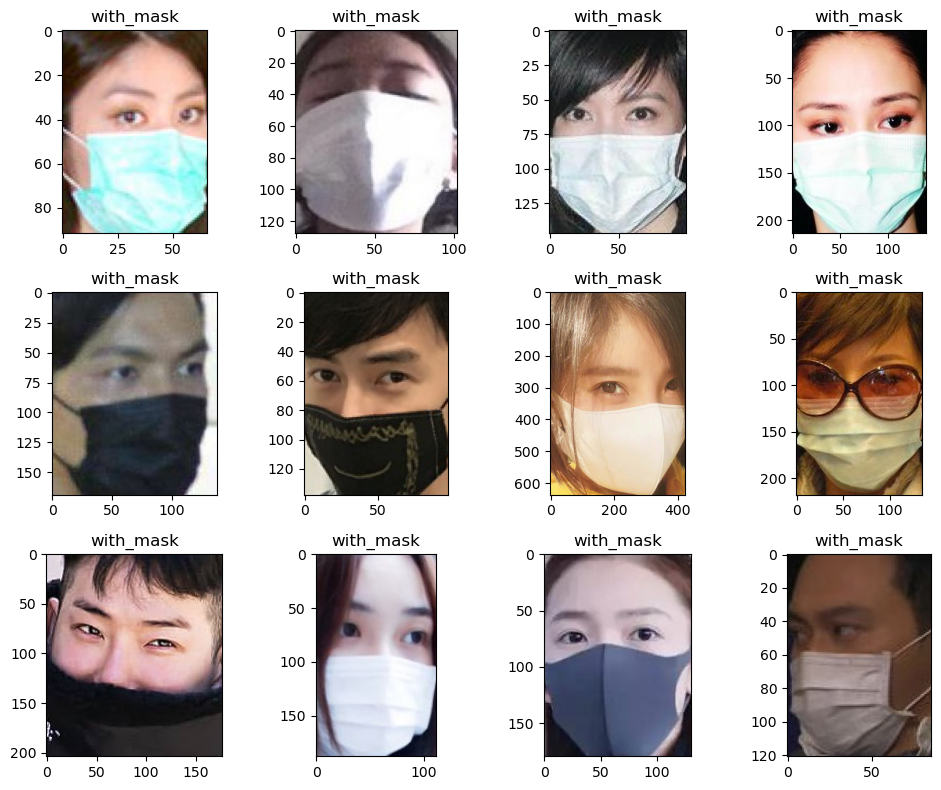

In [10]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [11]:
images,labels=shuffle(images,labels)

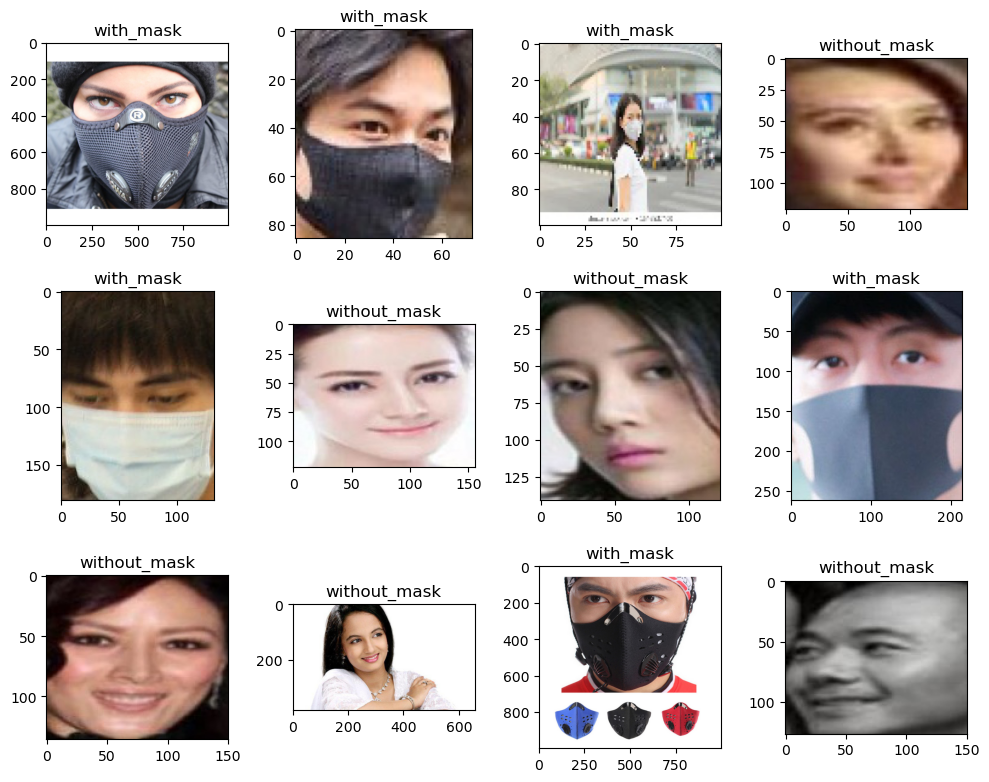

In [12]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [13]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

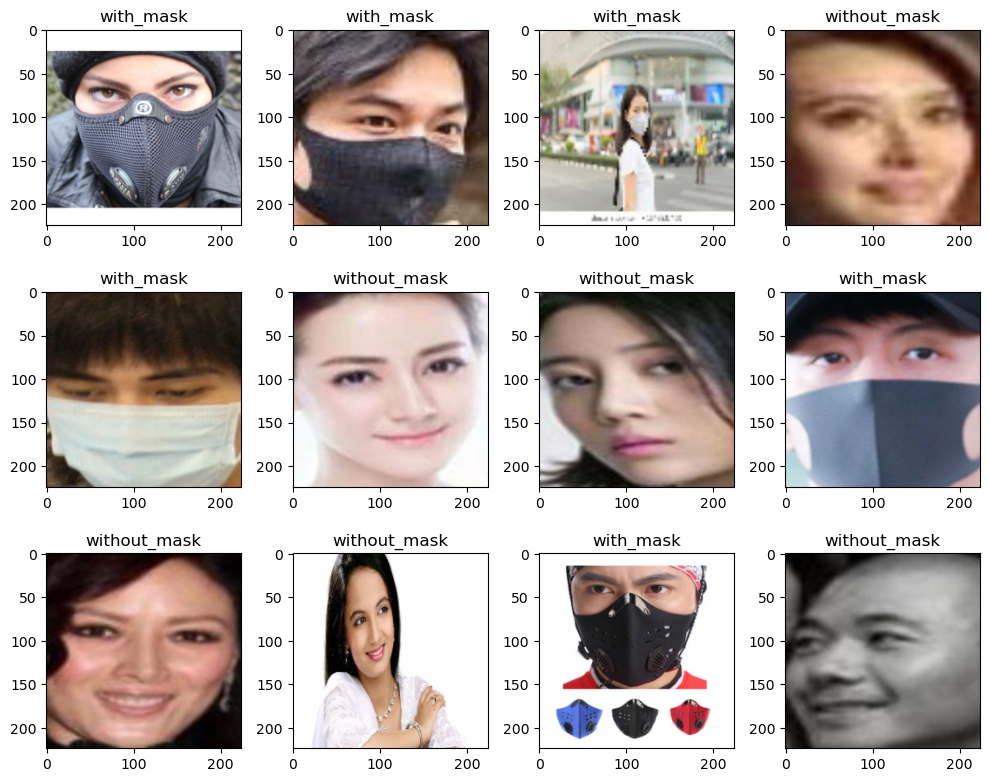

In [15]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [16]:
X=np.array(X)
y=np.array(labels)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [19]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [20]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x20d96579c90>

In [21]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [22]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
 dense_2 (Dense)             (None, 2)                 30        
                                                                 
Total params: 2,340,908
Trainable params: 82,924
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
83/83 [==============================] - 45s 462ms/step - loss: 0.2680 - accuracy: 0.8925 - val_loss: 0.0581 - val_accuracy: 0.9786
Epoch 2/10
83/83 [==============================] - 36s 433ms/step - loss: 0.0226 - accuracy: 0.9951 - val_loss: 0.0720 - val_accuracy: 0.9786
Epoch 3/10
83/83 [==============================] - 34s 413ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0646 - val_accuracy: 0.9786
Epoch 4/10
83/83 [==============================] - 36s 434ms/step - loss: 0.0071 - accuracy: 0.9970 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 5/10
83/83 [==============================] - 37s 443ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0754 - val_accuracy: 0.9857
Epoch 6/10
83/83 [==============================] - 38s 458ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.0672 - val_accuracy: 0.9857
Epoch 7/10
83/83 [==============================] - 38s 455ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0730 - val_accuracy: 0.9857

In [28]:
y_pred=model.predict(X_test)

22/22 [==============================] - 14s 405ms/step


In [30]:
y_pred=[np.argmax(i) for i in y_pred]

In [32]:
accuracy_score(y_test,y_pred)

0.997134670487106

<Axes: >

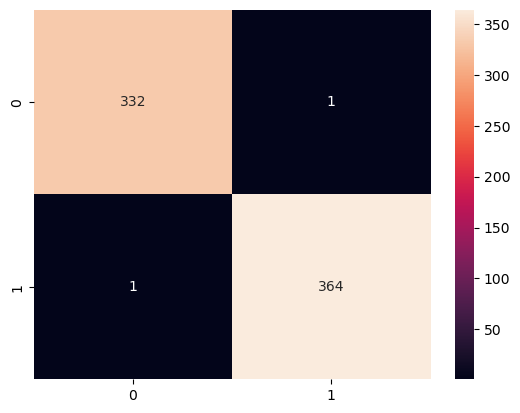

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       365

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698

